In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

data = pd.read_csv("Admission_Predict_Ver1.1.csv")

In [2]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
print(data.shape)

(500, 9)


In [4]:
continuous_features = data[['GRE Score','TOEFL Score','University Rating','SOP','LOR','CGPA']].values /100

categorical_research_features = data['Research'].values

Y = data['Chance of Admit']

In [5]:
data = pd.DataFrame(continuous_features,columns=['GRE Score','TOEFL Score','University Rating','SOP','LOR','CGPA'])

data['Research'] = categorical_research_features

X = data

In [6]:
X = tf.constant(X.values,dtype= tf.float32)
Y = tf.constant(Y.values,dtype = tf.float32)

In [7]:
num_epochs = 100
bias =0num_sample = X.shape[0]
batch_size =10
leanring_rate = 0.01

num_features = X.shape[1]

weights = tf.random.normal((num_features,1))

bias =0

Loss is 41.15611267089844
Loss is 37.58217239379883
Loss is 34.422080993652344
Loss is 31.6219482421875
Loss is 29.135364532470703
Loss is 26.922319412231445
Loss is 24.94828987121582
Loss is 23.183443069458008
Loss is 21.601972579956055
Loss is 20.18153190612793
Loss is 18.902742385864258
Loss is 17.7487735748291
Loss is 16.704998016357422
Loss is 15.75867748260498
Loss is 14.898709297180176
Loss is 14.115397453308105
Loss is 13.400266647338867
Loss is 12.745895385742188
Loss is 12.145774841308594
Loss is 11.59418773651123
Loss is 11.08610725402832
Loss is 10.61710262298584
Loss is 10.18326187133789
Loss is 9.781131744384766
Loss is 9.407649993896484
Loss is 9.060103416442871
Loss is 8.736080169677734
Loss is 8.43343448638916
Loss is 8.150254249572754
Loss is 7.884829998016357
Loss is 7.6356353759765625
Loss is 7.401298522949219
Loss is 7.180593967437744
Loss is 6.972414970397949
Loss is 6.775765895843506
Loss is 6.589749813079834
Loss is 6.413553714752197
Loss is 6.246443271636963
Lo

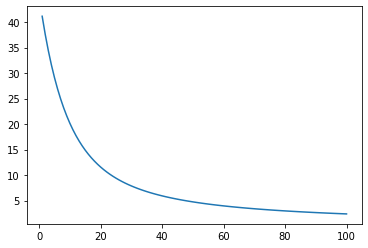

In [8]:
epochs_plot = list()
loss_plot = list()
epoch_loss = list()

for i in range(num_epochs):
    
    output = tf.tensordot(X,weights,axes =1) + bias
    
    loss =  tf.reduce_mean(tf.square(output - Y))
    
    epoch_loss.append(loss.numpy())
    
    dJ_dH = tf.reshape(tf.reduce_mean(2 * (output - Y)),[1,1])
    
    dH_dW = X
    
    dJ_dW = tf.reduce_mean(dJ_dH * dH_dW)
    
    dJ_dB = tf.reduce_mean(dJ_dH)

    weights = weights -  (leanring_rate * dJ_dW)
    bias  = bias - (leanring_rate * dJ_dB)
    
    loss = np.array(epoch_loss).mean()
    epochs_plot.append(i +1)
    loss_plot.append(loss)

    print("Loss is {}".format(loss))
    
plt.plot(epochs_plot,loss_plot)